# Data Mining on coutries

# introduction 
Le projet consiste en une analyse statistique exploratoire des données relatives à différents pays. L'objectif principal est de comprendre et d'explorer les caractéristiques socio-économiques des pays à partir des données disponibles par exemple le PIB par habitant, le taux d'alphabétisation, l'espérance de vie, le taux de chômage, etc.

1)Compréhension des données : Examiner la structure et la nature des données disponibles.

2)Identification des tendances : Identifier les tendances et les schémas qui émergent des données, tels que les corrélations entre les variables.

3)Segmentation des pays : Utiliser des techniques de clustering pour regrouper les pays similaires en fonction de leurs caractéristiques socio-économiques.

4)Analyse des facteurs : Effectuer une analyse factorielle pour réduire la dimensionnalité des données et identifier les facteurs sous-jacents qui expliquent la variation observée.

5)Visualisation des résultats : Utiliser des graphiques et des visualisations pour présenter de manière efficace les résultats de l'analyse et permettre une interprétation intuitive.

 -->cela peut être utile pour la prise de décision, la planification stratégique et la recherche dans divers domaines tels que l'économie, la santé publique, l'éducation, etc.








#Importation des libraries et lecture du fichier csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


sheet = pd.read_csv(r"C:\Users\Amen Khlifi\OneDrive\Bureau\countries_of_the_world.csv" , na_values = ['-'])
#Mettre le fichier dans un DataFrame
df=pd.DataFrame(sheet)
#Afficher les premières lignes
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [2]:
#Taille du dataset
df.shape

(227, 20)

In [3]:
#type de chaque colonne
print(df.dtypes)

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object


In [4]:
#nombre de valeurs dans chaque colonne
df.count()

Country                               227
Region                                227
Population                            227
Area (sq. mi.)                        227
Pop. Density (per sq. mi.)            227
Coastline (coast/area ratio)          227
Net migration                         224
Infant mortality (per 1000 births)    224
GDP ($ per capita)                    226
Literacy (%)                          208
Phones (per 1000)                     223
Arable (%)                            225
Crops (%)                             225
Other (%)                             225
Climate                               205
Birthrate                             224
Deathrate                             223
Agriculture                           212
Industry                              211
Service                               212
dtype: int64

In [5]:
#Supprimer des Colonne 
df=df.drop(columns={'Other (%)', 'Coastline (coast/area ratio)', 'Arable (%)','Climate' , 'Crops (%)' , 'Phones (per 1000)'})
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,23.06,163.07,700.0,36.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,-4.93,21.52,4500.0,86.5,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,-0.39,31.00,6000.0,70.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,-20.71,9.27,8000.0,97.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,6.60,4.05,19000.0,100.0,8.71,6.25,NaN,NaN,NaN


In [6]:
#taille du dataset aprés la supression du colonnes
df.shape

(227, 14)

QUELQUES INFOS SUR LES PAYS

In [7]:
#le pays qui a la population la plus grande
print(df.loc[df['Population'] == df['Population'].max(), 'Country'].iloc[0] + str(df['Population'].max()))

China 1313973713


In [8]:
#le pays qui a la population la plus petite
print(df.loc[df['Population'] == df['Population'].min(), 'Country'].iloc[0] + str(df['Population'].min()))

St Pierre & Miquelon 7026


In [9]:
#le pays qui a la grande superficie
print(df.loc[df['Area (sq. mi.)'] == df['Area (sq. mi.)'].max(), 'Country'].iloc[0] + str(df['Population'].max()))

Russia 1313973713


In [10]:
#le pays qui a la petite superficie
print(df.loc[df['Area (sq. mi.)'] == df['Area (sq. mi.)'].min(), 'Country'].iloc[0] + str(df['Population'].min()))

Monaco 7026


In [11]:
#les pays qui leur population depasse milliard
df.loc[lambda df : df['Population'] > 10**9, 'Country']

42    China 
94    India 
Name: Country, dtype: object

In [12]:
#les pays qui leur population est inferieur à million
df.loc[lambda df : df['Population'] < 10**6, 'Country']

3         American Samoa 
4                Andorra 
6               Anguilla 
7      Antigua & Barbuda 
10                 Aruba 
              ...        
209               Tuvalu 
217              Vanuatu 
220       Virgin Islands 
221    Wallis and Futuna 
223       Western Sahara 
Name: Country, Length: 71, dtype: object

In [13]:
#la population qui le GDP le plus grand
df.loc[df['GDP ($ per capita)'] == df['GDP ($ per capita)'].max(), 'Country'].iloc[0]

'Luxembourg '

# Statistiques bivariée

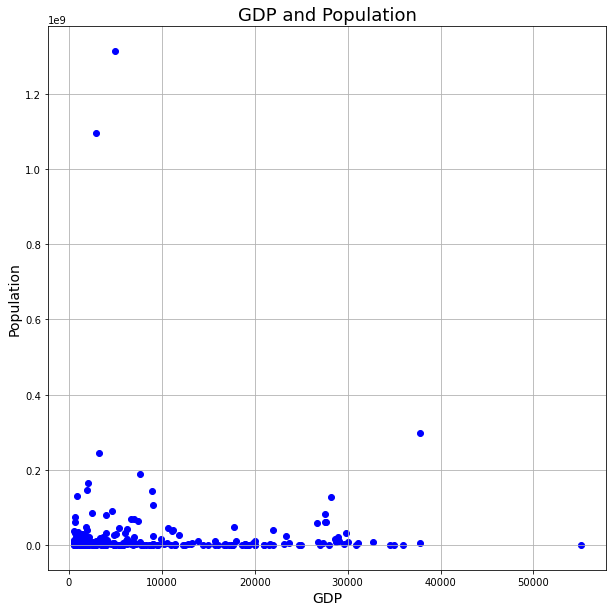

In [14]:
#on veut étudier la relation entre le GDP et la population
#afin de deduire une interpretation
#en utilisant scatter graphe

plt.figure(figsize=(10,10))
plt.title("GDP and Population",fontsize=18)
plt.xlabel ("GDP",fontsize=14)
plt.ylabel ("Population",fontsize=14)
plt.grid(True)
plt.scatter(df['GDP ($ per capita)'],df['Population'],color='blue')
plt.show()

#Interprétation: Il n'y a pas de corrélation évidente entre le GDP et la population.Cela signifie qu'il n'y a pas de relation directe entre le niveau de richesse d'un pays et sa taille de population.
Les points sont dispersés sur tout le graphique, indiquant que de nombreux facteurs influencent la population d'un pays, tels que les taux de natalité, les taux de mortalité et les migrations.

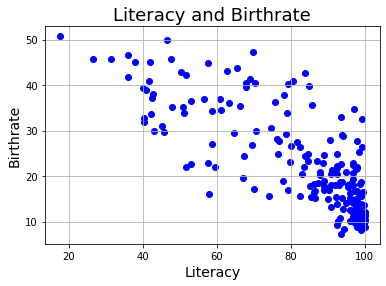

In [15]:
#on etudie la relation entre Literacy and birthrate
plt.title("Literacy and Birthrate",fontsize=18)
plt.xlabel ("Literacy",fontsize=14)
plt.ylabel ("Birthrate",fontsize=14)
plt.grid(True)
plt.scatter(df['Literacy (%)'],df['Birthrate'],color='blue')
plt.show()

In [ ]:
#Interprétation: on remarque que lorsque la Literacy est elèvé le Birthrate est faible et lorsque la Literacy est faible le Birthrate est elèvé 
forte corrèlation en sense contraire(négative).

# Preparation du dataset pour la ACH

# Pour l'application du dendogramme les valeur de colonnes doit etre en int alors on va arroundir les colonnes Literacy et Birthrate et on appliquera le casting 

In [16]:
df['Literacy (%)'] = df['Literacy (%)'].round()
df['Birthrate'] = df['Birthrate'].round()
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,23.06,163.07,700.0,36.0,47.0,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,-4.93,21.52,4500.0,86.0,15.0,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,-0.39,31.00,6000.0,70.0,17.0,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,-20.71,9.27,8000.0,97.0,22.0,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,6.60,4.05,19000.0,100.0,9.0,6.25,NaN,NaN,NaN


In [17]:
#verification du type du colonne
df['Birthrate'].dtypes

dtype('float64')

In [18]:
#les valeurs et leurs occurences dans la colonne Literacy
df['Literacy (%)'].value_counts(dropna=False)
#on remarque qu'il y a des valeurs de type NaN

99.0     22
98.0     21
NaN      19
100.0    18
97.0     14
94.0      9
93.0      8
96.0      6
86.0      6
92.0      6
91.0      5
89.0      5
42.0      4
85.0      4
79.0      4
58.0      3
95.0      3
70.0      3
84.0      3
68.0      3
40.0      3
48.0      2
51.0      2
66.0      2
77.0      2
69.0      2
52.0      2
80.0      2
43.0      2
87.0      2
36.0      2
88.0      2
78.0      2
46.0      2
50.0      2
76.0      2
53.0      2
61.0      2
90.0      2
63.0      2
83.0      2
59.0      2
82.0      2
65.0      1
74.0      1
38.0      1
31.0      1
67.0      1
56.0      1
18.0      1
45.0      1
41.0      1
60.0      1
27.0      1
71.0      1
75.0      1
81.0      1
Name: Literacy (%), dtype: int64

In [19]:
#on supprime les valeurs NaN du colonnes Birthrate et Literacy
df=df.dropna(subset=['Literacy (%)'])

In [20]:
df=df.dropna(subset=['Birthrate'])

In [21]:
#verification de la supression des valeurs NaN
df['Birthrate'].value_counts(dropna=False)

10.0    17
9.0     11
18.0    11
11.0    10
16.0     9
22.0     9
14.0     9
23.0     8
17.0     8
15.0     7
19.0     7
13.0     7
12.0     6
25.0     6
21.0     5
20.0     5
35.0     5
40.0     5
36.0     4
28.0     4
34.0     4
29.0     4
27.0     4
43.0     3
37.0     3
45.0     3
46.0     3
41.0     3
33.0     3
30.0     3
47.0     2
39.0     2
42.0     2
38.0     2
8.0      2
31.0     2
26.0     2
24.0     1
44.0     1
7.0      1
32.0     1
50.0     1
51.0     1
Name: Birthrate, dtype: int64

In [22]:
#casting
df = df.astype({"Birthrate": int, "Literacy (%)": int})

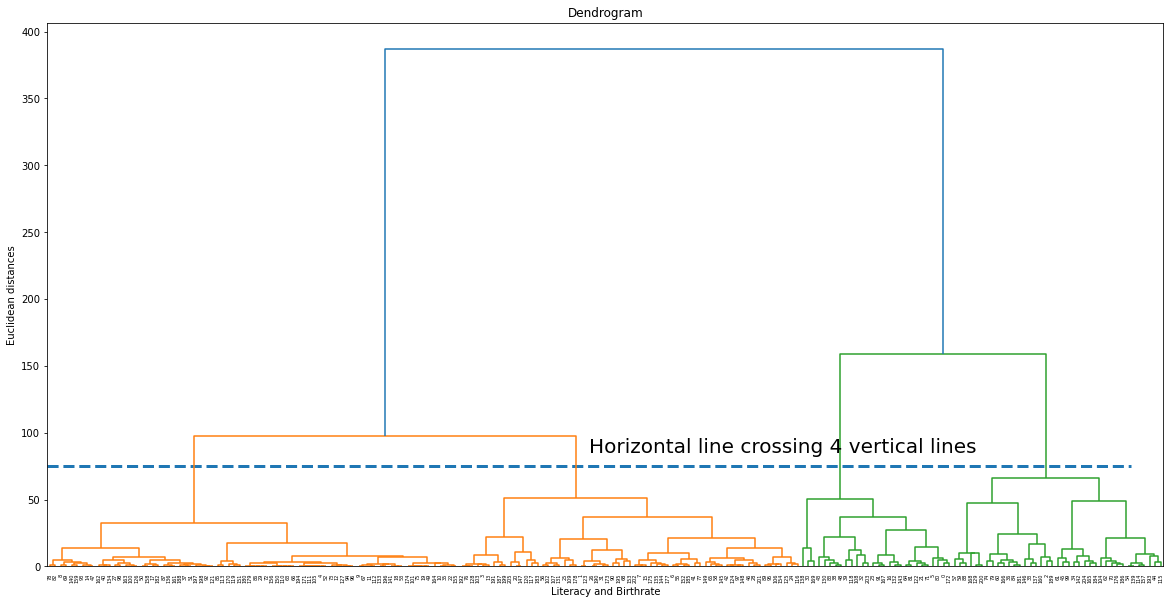

In [23]:
#Dendogramme
#la valeur X contient tout les lignes et les colonnes 8 : Literacy , 9: Birthrate
X = df.iloc[:,[8,9]].values
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
plt.title('Dendrogram')
plt.xlabel('Literacy and Birthrate')
plt.ylabel('Euclidean distances')
plt.hlines(y=75,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=1000,y=85,s='Horizontal line crossing 4 vertical lines',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()
#on decoupe le dendogramme en 4 classes 

-La hauteur des liens dans le dendrogramme représente la distance euclidienne entre les clusters ou les points de données.
-Les lignes horizontales dans le dendrogramme indiquent les distances à partir desquelles les clusters se forment.
-Les lignes verticales représentent les regroupements de données ou les clusters formés à différentes étapes du processus.

La ligne horizontale bleue pointillée(une distance d'environ 75 sur l'axe des distances euclidiennes) indique un seuil de distance auquel les clusters sont définis.
À ce seuil, le dendrogramme se divise en quatre clusters distincts (indiqués par les quatre lignes verticales traversées par la ligne bleue).Les pays ou régions situés dans le même cluster ont des profils similaires en termes de taux Literacy and Birthrate et de taux d'Euclidean distances.




Variance expliquée par chaque composante principale:
[0.75075521 0.24924479]




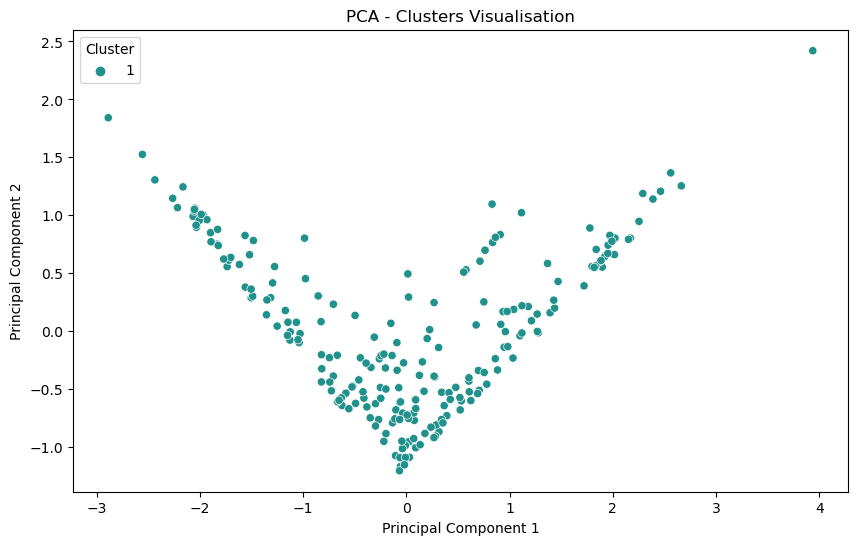

In [8]:
# Remplacer les valeurs manquantes par la moyenne des colonnes
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_clean = imputer.fit_transform(X_scaled)

# Appliquer PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clean)

# Créer un DataFrame pour la visualisation
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = pd.Series(sch.fcluster(sch.linkage(X_clean, method='ward'), t=75, criterion='distance'))

# Interprétation des résultats de PCA
print("Variance expliquée par chaque composante principale:")
print(pca.explained_variance_ratio_)
print("\n")

# Visualisation des clusters dans l'espace PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', legend='full')
plt.title('PCA - Clusters Visualisation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


  PCA nous aide à identifier les combinaisons linéaires de variables initiales qui expliquent la plus grande partie de la variabilité dans les données. Cela nous permet de simplifier l'analyse en réduisant le nombre de dimensions à examiner, tout en conservant les informations importantes.
 
 le PIB par habitant et le taux d'alphabétisation sont des variables d'entrée dans notre analyse PCA, tandis que les composantes principales sont des nouvelles variables générées par l'analyse qui capturent les patterns ou la structure sous-jacente des données.

In [9]:
# Obtenir les charges factorielles
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Créer un DataFrame pour visualiser les charges factorielles
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df.columns[8:10])

# Afficher les charges factorielles
print("Charges factorielles pour PC1 et PC2 :")
print(loadings_df)


Charges factorielles pour PC1 et PC2 :
                         PC1       PC2
GDP ($ per capita)  0.886254  0.467952
Literacy (%)        0.812153 -0.510648


### PC1
La variable "GDP ($ per capita)" a une charge factorielle élevée sur PC1 (0.886). Cela signifie que la variation de cette variable est fortement corrélée avec la variation de PC1.
La variable Literacy a également une charge factorielle élevée sur PC1 (0.812). Cela suggère que la variation du taux d'alphabétisation est également fortement corrélée avec la variation de PC1

### pc2

La variable "GDP ($ per capita)" a une charge factorielle positive, mais moins élevée, sur PC2 (0.468). Cela indique qu'il y a une certaine corrélation entre le PIB par habitant et PC2, mais cette corrélation est moins forte que celle avec PC1.
La variable "Literacy (%)" a une charge factorielle négative sur PC2 (-0.511). Cela signifie qu'il y a une relation inverse entre le taux d'alphabétisation et PC2. Les pays avec des taux d'alphabétisation plus élevés ont tendance à avoir des valeurs plus basses sur PC2.


PC1 : Cette composante principale capture principalement la variation liée au niveau socio-économique des pays. Les pays ayant un PIB par habitant plus élevé et des taux d'alphabétisation plus élevés ont tendance à être positionnés positivement sur PC1, ce qui explique environ 75% de la variance totale des données.
PC2 :  capture une variation différente, peut-être liée à des facteurs socio-culturels ou à la distribution des ressources. Les pays avec des taux d'alphabétisation plus faibles et des niveaux de PIB par habitant plus modérés sont positionnés positivement sur PC2, expliquant environ 25% de la variance totale des données.

En résumé, PC1 représente les aspects socio-économiques dominants, tandis que PC2 représente des dimensions supplémentaires de variation, offrant une vue plus complète de la diversité des pays dans le jeu de données.







In [14]:
from sklearn.cluster import AgglomerativeClustering

# Appliquer le clustering hiérarchique avec 4 clusters en utilisant la métrique euclidienne
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_imputed)

# Afficher les clusters attribués à chaque échantillon
print("Clusters attribués à chaque échantillon:")
print(y_hc)


Clusters attribués à chaque échantillon:
[2 3 2 3 3 3 3 3 2 3 3 2 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 2 3 3 2 2
 3 3 3 3 2 1 2 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 3
 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 0 2 2 3 3 3 2 3 0 3 3 2 2 3 2 2
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 0 3 3 3 3 3 2 2 3 3 2 2 3
 3 3 3 3 0 3 3 3 0 3 3 3 3 2 2 2 3 3 3 3 2 0 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3
 3 3 3 3 2 2 2 2 3 3 3 3 2 2 3 2 2 3 3 3 3 2 3 3 3 2 2 3 2 0 3 2 3 2 2 3 3
 3 3 2 3 3]


Les clusters attribués à chaque échantillon représentent les regroupements identifiés par l'algorithme de clustering hiérarchique. Chaque numéro de cluster (0, 1, 2, 3) correspond à un groupe spécifique.

remarque : 
Le dendrogramme est une représentation visuelle de la manière dont les échantillons sont regroupés à différentes distances. Il montre la structure hiérarchique des regroupements et peut vous aider à déterminer le nombre de clusters à choisir. Cependant, il peut être difficile de déterminer précisément quels échantillons appartiennent à quels clusters juste en regardant le dendrogramme. 

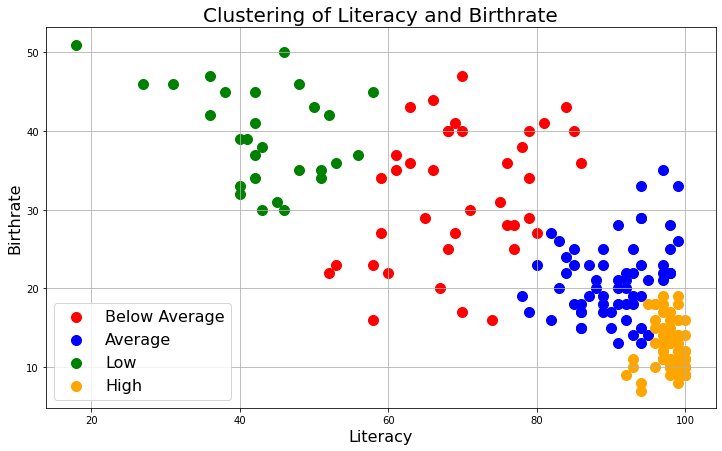

In [25]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Below Average')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Average')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Low')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'orange', label = 'High')
plt.title('Clustering of Literacy and Birthrate',fontsize=20)
plt.xlabel('Literacy',fontsize=16)
plt.ylabel('Birthrate',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

### On observe qu'il y a 4 catégories de population selon le Birthrate et Literacy

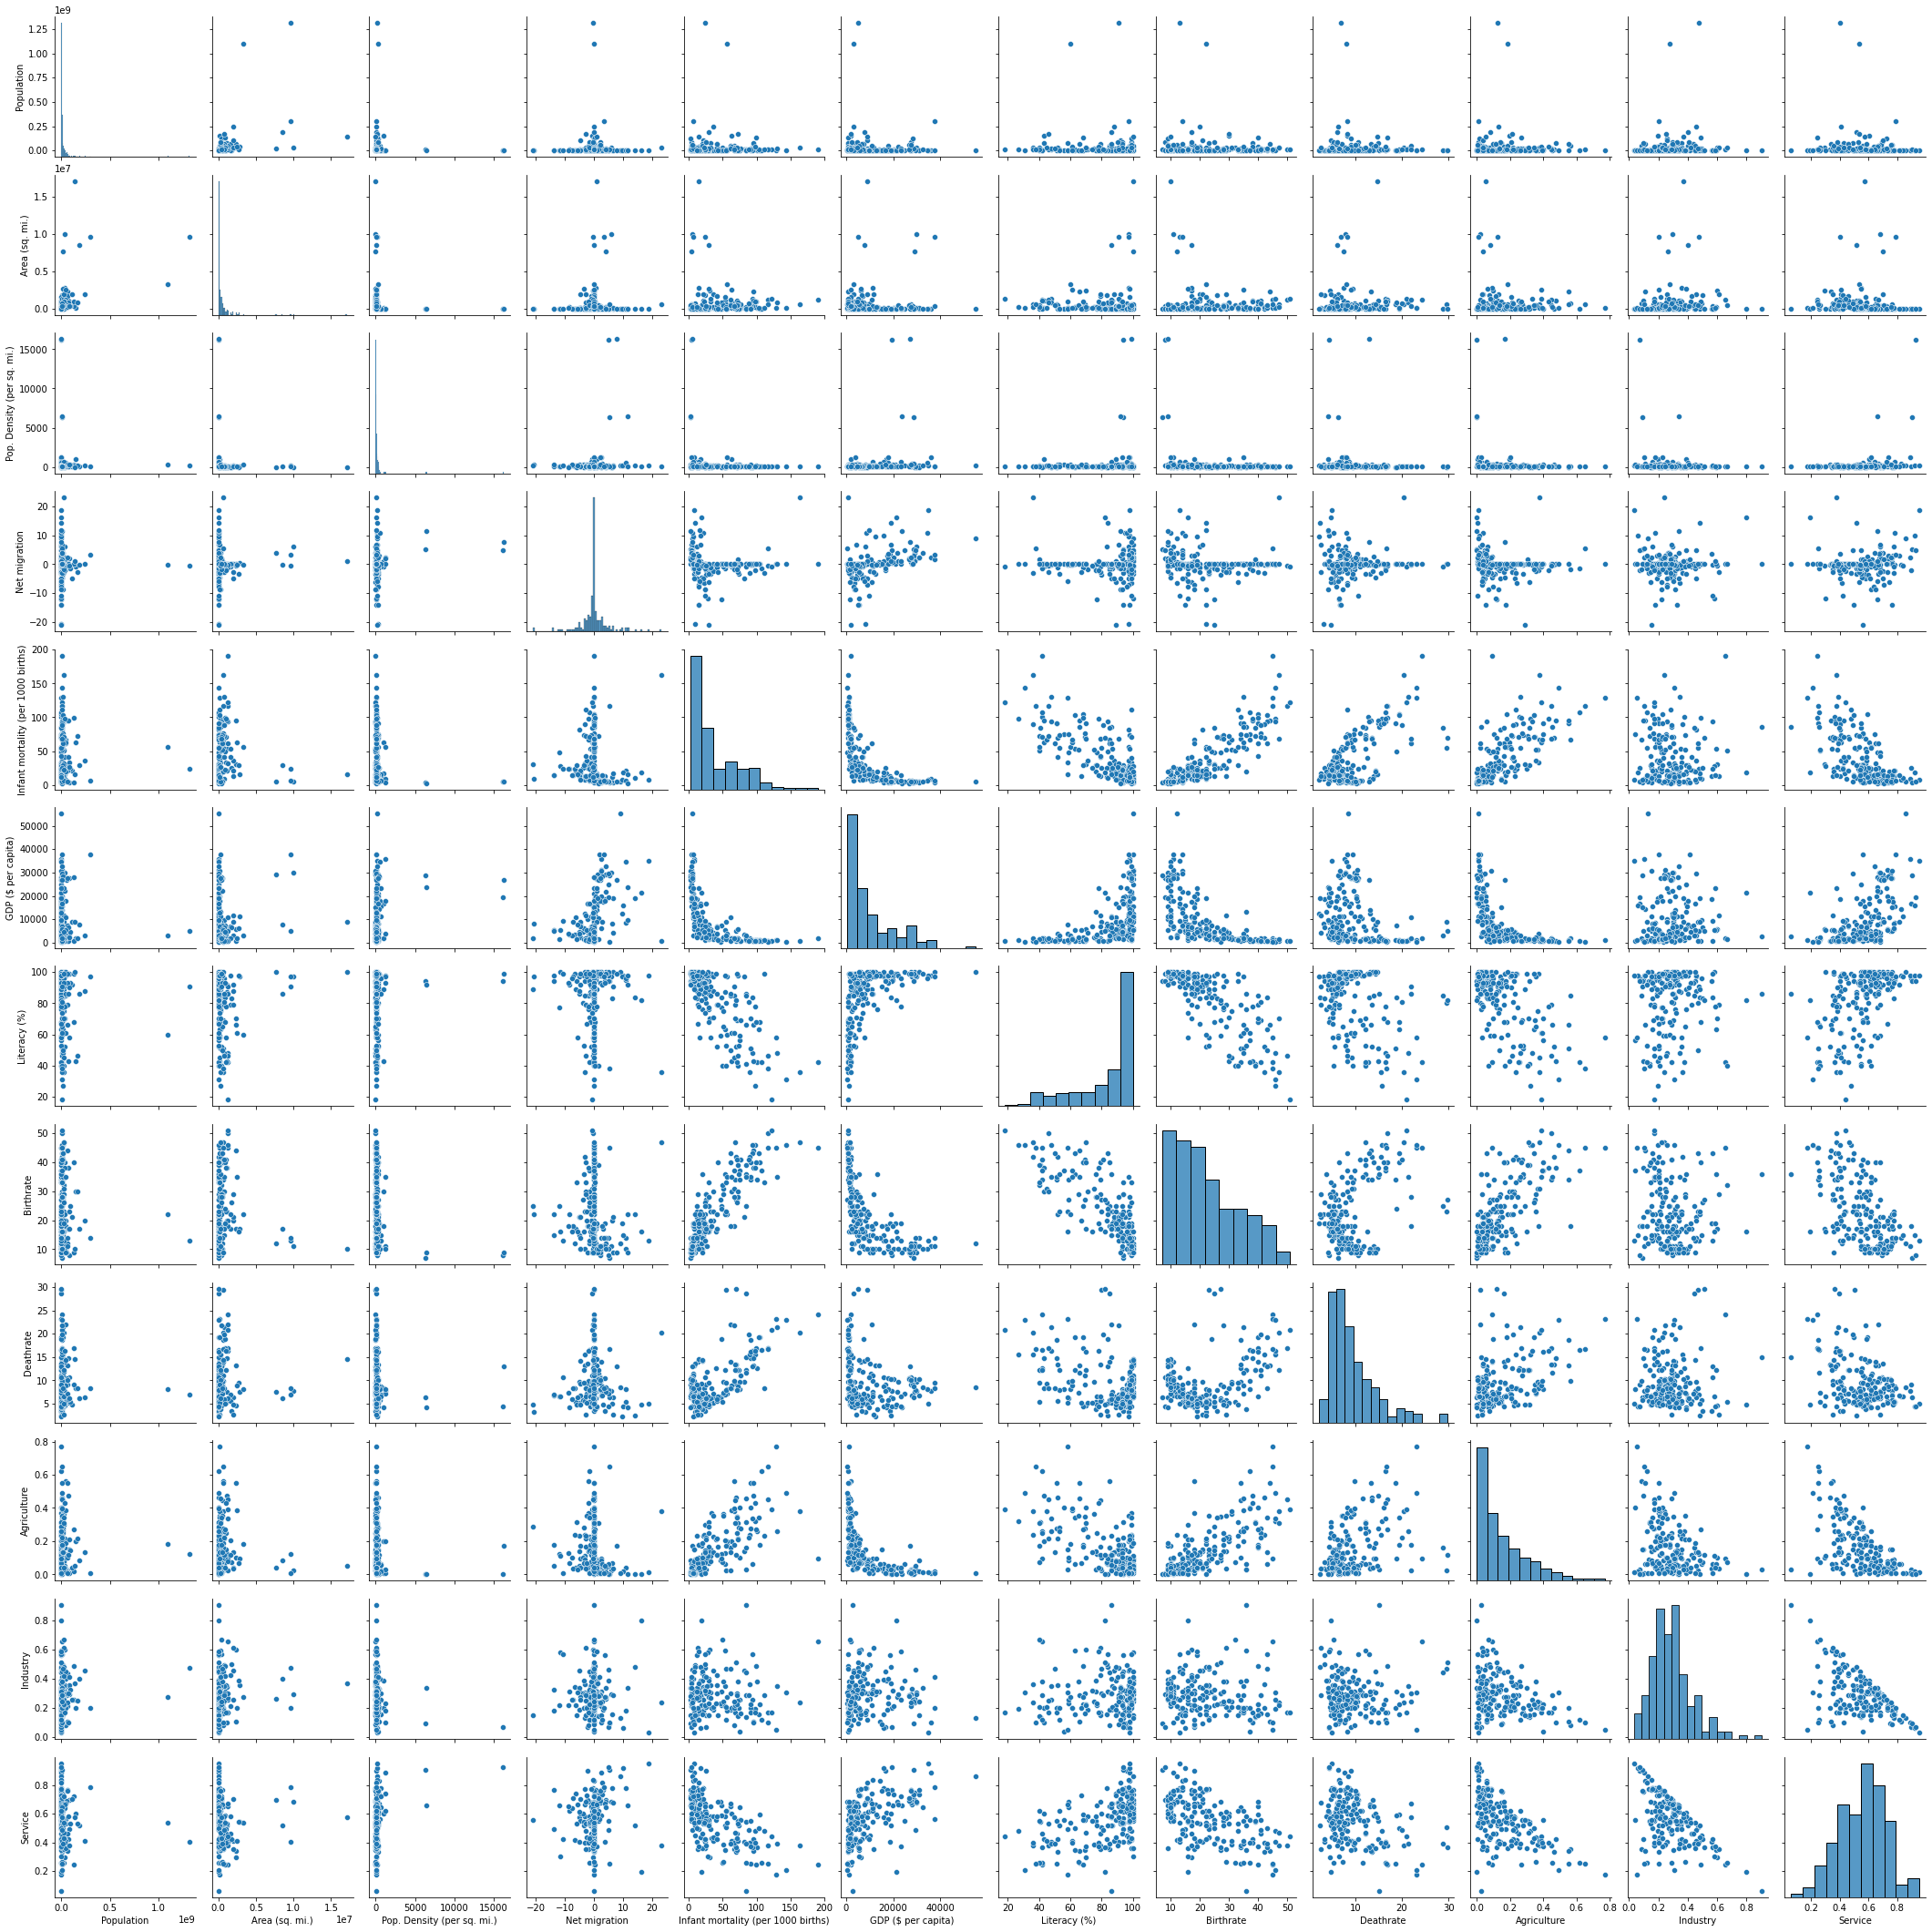

In [26]:
#Tout les graphes selon cette dataset
import seaborn as sns
sns.pairplot(df)

Diagrammes de dispersion sur la diagonale principale:permet de voir la distribution de chaque variable
Diagrammes de dispersion hors diagonale:dispersion croisant deux variables différentes.

les points du diagramme de dispersion(population,agriculture) sont alignés le long d'une ligne diagonale, cela suggère une corrélation linéaire positive ou négative entre les deux variables. les points sont dispersés sans schéma évident,comme par exemple dans le diagramme(birthrate,industry) cela suggère une faible corrélation ou aucune corrélation du tout.

In [18]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

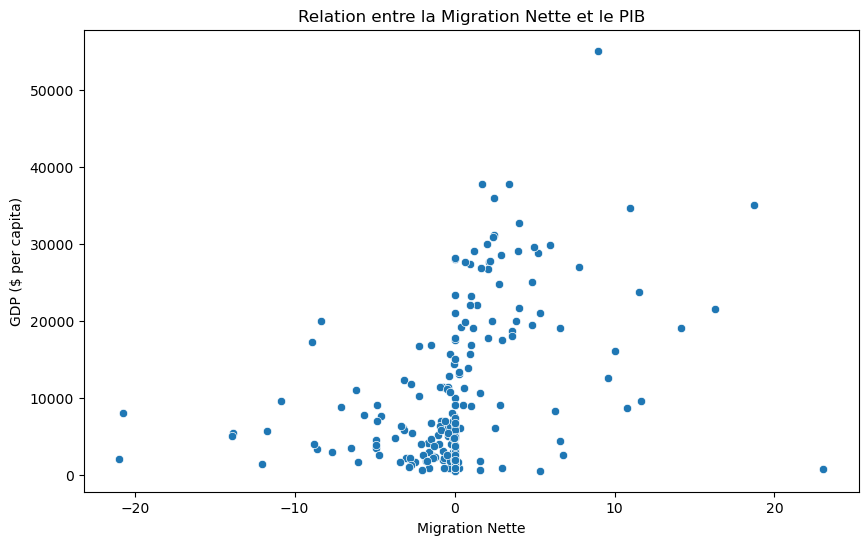

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes à inclure dans l'analyse
selected_columns = ['Country', 'Population', 'GDP ($ per capita)', 'Net migration']
selected_data = df[selected_columns]

# Créer le graphique
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Net migration', y='GDP ($ per capita)', data=selected_data)

# Ajouter des étiquettes et un titre
plt.xlabel('Migration Nette')
plt.ylabel('GDP ($ per capita)')
plt.title('Relation entre la Migration Nette et le PIB')

# Afficher le graphique
plt.show()


 on observe que les points tendent à se regrouper vers le bas de l'axe des y, cela indique que les pays avec une migration nette plus élevée ont tendance à avoir un PIB par habitant plus bas.